In [1]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data from a number of sources was collected for the solubility of CO2 in water

In [2]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/thermodynamics/VLE/water-CO2-NaCl.csv')
expdata_df

,ID,point,pressure,temperature,comp1,comp2,comp3,comp4,x1-molfrac,x2-kg,x3-molal,x4-molal,reference,comment
0,1,1.0,0.9815,313.38,CO2,water,Na+,Cl-,0.00033,1.0,0.52,0.52,Kiepe2002,x1-nosalt
1,2,2.0,3.8500,313.38,CO2,water,Na+,Cl-,0.00136,1.0,0.52,0.52,Kiepe2002,x1-nosalt
2,3,3.0,5.0943,313.38,CO2,water,Na+,Cl-,0.00180,1.0,0.52,0.52,Kiepe2002,x1-nosalt
3,4,4.0,8.8662,313.38,CO2,water,Na+,Cl-,0.00315,1.0,0.52,0.52,Kiepe2002,x1-nosalt
4,5,5.0,19.9820,313.38,CO2,water,Na+,Cl-,0.00675,1.0,0.52,0.52,Kiepe2002,x1-nosalt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,60.0,38.0130,352.77,CO2,water,Na+,Cl-,0.00365,1.0,4.34,4.34,Kiepe2002,x1-nosalt
60,61,61.0,47.9800,352.77,CO2,water,Na+,Cl-,0.00449,1.0,4.34,4.34,Kiepe2002,x1-nosalt
61,62,62.0,62.4130,352.77,CO2,water,Na+,Cl-,0.00561,1.0,4.34,4.34,Kiepe2002,x1-nosalt
62,63,63.0,83.5410,352.77,CO2,water,Na+,Cl-,0.00703,1.0,4.34,4.34,Kiepe2002,x1-nosalt


In [3]:
referenceList = expdata_df['reference'].unique().tolist()
temperatureList = expdata_df['temperature'].unique().tolist()
data = expdata_df.groupby(['temperature'])['pressure'].count()
print('references ', referenceList)
print('temperature ', temperatureList)
print('numer of data points for each temperature:')
print(data)

references  ['Kiepe2002']
temperature  [313.38, 313.31, 353.08, 353.07, 352.77]
numer of data points for each temperature:
temperature
313.31    11
313.38    22
352.77    10
353.07    10
353.08    11
Name: pressure, dtype: int64


<Figure size 640x480 with 0 Axes>

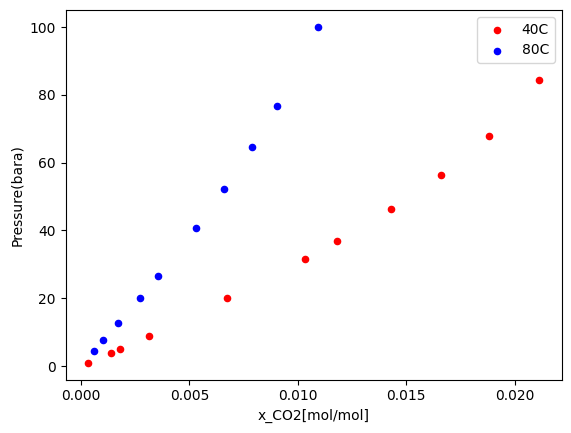

In [4]:
from matplotlib import pyplot as plt
fig = plt.figure()

data313 = expdata_df.loc[(expdata_df['temperature'] == 313.38) & (expdata_df['x3-molal'] == 0.52)]
plot1 = data313.plot(x='x1-molfrac', y='pressure', kind='scatter',ylabel='tressure(bara)', xlabel='x_CO2[mol/mol]',color='red')

data353 = expdata_df.loc[expdata_df['temperature'] == 353.07]
data353.plot(ax=plot1, x='x1-molfrac', y='pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='blue')

plt.legend(['40C', '80C'])
plt.show()

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

In [5]:
# The data set of Nighswander1989 will be removed
expdata_df_update = expdata_df.loc[expdata_df['reference'] == 'Kiepe2002']
expdata_df_update

,ID,point,pressure,temperature,comp1,comp2,comp3,comp4,x1-molfrac,x2-kg,x3-molal,x4-molal,reference,comment
0,1,1.0,0.9815,313.38,CO2,water,Na+,Cl-,0.00033,1.0,0.52,0.52,Kiepe2002,x1-nosalt
1,2,2.0,3.8500,313.38,CO2,water,Na+,Cl-,0.00136,1.0,0.52,0.52,Kiepe2002,x1-nosalt
2,3,3.0,5.0943,313.38,CO2,water,Na+,Cl-,0.00180,1.0,0.52,0.52,Kiepe2002,x1-nosalt
3,4,4.0,8.8662,313.38,CO2,water,Na+,Cl-,0.00315,1.0,0.52,0.52,Kiepe2002,x1-nosalt
4,5,5.0,19.9820,313.38,CO2,water,Na+,Cl-,0.00675,1.0,0.52,0.52,Kiepe2002,x1-nosalt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,60.0,38.0130,352.77,CO2,water,Na+,Cl-,0.00365,1.0,4.34,4.34,Kiepe2002,x1-nosalt
60,61,61.0,47.9800,352.77,CO2,water,Na+,Cl-,0.00449,1.0,4.34,4.34,Kiepe2002,x1-nosalt
61,62,62.0,62.4130,352.77,CO2,water,Na+,Cl-,0.00561,1.0,4.34,4.34,Kiepe2002,x1-nosalt
62,63,63.0,83.5410,352.77,CO2,water,Na+,Cl-,0.00703,1.0,4.34,4.34,Kiepe2002,x1-nosalt


# Compare to NeqSim Calculations

## NeqSim calculations at 288.15 K

<Figure size 640x480 with 0 Axes>

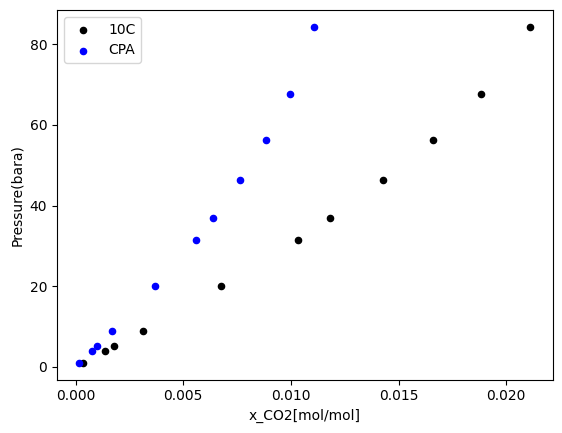

In [10]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

# Creating a fluid in neqsim
fluid1 = fluid('Electrolyte-CPA-EoS') #create a fluid using the SRK-EoS
fluid1.addComponent('CO2', 1.0)
fluid1.addComponent("Na+", 0.52) 
fluid1.addComponent("Cl-", 0.52) 
fluid1.addComponent("water", 1.0, 'kg/sec') 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(40.0, 'C')

def solubility(pres):
    fluid1.setPressure(pres, 'bara')
    TPflash(fluid1)
    return fluid1.getPhase('aqueous').getComponent('CO2').getx()

pressures = data313['pressure'].values.tolist()
x_res = [solubility(P) for P in pressures]

dataWithExperiment = data313.assign(x_CPA = x_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = data313.plot(x='x1-molfrac', y='pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='black')	
dataWithExperiment.plot(ax=plot1, x='x_CPA', y='pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='blue')	
plt.legend(['10C', 'CPA'])
plt.show()

In [12]:
from neqsim.thermo import printFrame
printFrame(fluid1)

                     0           1                            2  \
0                            total                          GAS   
1                  CO2  1.73764E-2                   9.97585E-1   
2                  Na+  9.03573E-3                  9.09367E-43   
3                  Cl-  9.03573E-3                  9.09367E-43   
4                water  9.64552E-1                   2.41472E-3   
5                                                                 
6              Density                                3.25297E2   
7        PhaseFraction                               6.37102E-3   
8            MolarMass   1.86692E1                    4.39472E1   
9             Z factor                               4.37635E-1   
10  Heat Capacity (Cp)                                7.93849E0   
11  Heat Capacity (Cv)                                8.1217E-1   
12      Speed of Sound                                2.48007E2   
13            Enthalpy  -2.48895E3                   -1.01894E

## Check to all data

In [7]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('CO2', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

def solubility(inp):
    fluid1.setPressure(inp[2], 'bara')
    fluid1.setTemperature(inp[1], 'K')
    try:
        TPflash(fluid1)
        return fluid1.getPhase('aqueous').getComponent('CO2').getx()
    except:
        return float('nan')
    
inpdata = expdata_df[['x1', 'Temperature', 'Pressure']].values.tolist()
solres = [solubility(inp) for inp in inpdata]
dataWithExperiment = expdata_df.assign(x_CPA = solres)

devdf = (dataWithExperiment['x_CPA'] - dataWithExperiment['x1']) / dataWithExperiment['x1']*100.0

dataWithExperimentAndDev = dataWithExperiment.assign(dev = devdf.values)

print('median average deviation ', devdf.mad(axis=0))

dataWithExperimentAndDev.to_csv('./water-CO2-exp.csv')

KeyError: "None of [Index(['x1', 'Temperature', 'Pressure'], dtype='object')] are in the [columns]"

# Parameter fitting

model  CPAs-SRK-EOS-statoil
mixing rule  classic-CPA_T
kij  -0.27686
kijT  0.001121


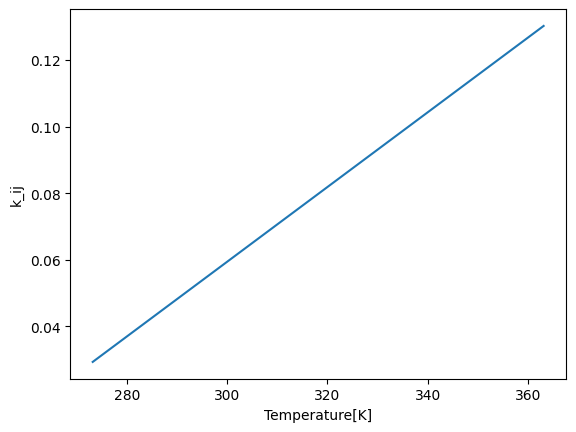

In [ ]:
# return intparam[i][j] + intparamT[i][j] * temperature
print('model ', fluid1.getModelName())
print('mixing rule ', fluid1.getMixingRuleName())
print('kij ', fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameter(0,1))
print('kijT ', fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameterT1(0,1))

kij = fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameter(0,1)
kijT = fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameterT1(0,1)

def calcKIJ(temp):
    return kij+kijT*temp

temperatures = np.arange(273.15, 373.15, 10.0)#range(273.0, 373.15, 10.0)
kijcalc = [calcKIJ(T) for T in temperatures]

plt.plot(temperatures, kijcalc)
plt.xlabel('Temperature[K]')
plt.ylabel('k_ij')
plt.show()

## Manual fiting

average deviation  0.019325632851788756


<Figure size 640x480 with 0 Axes>

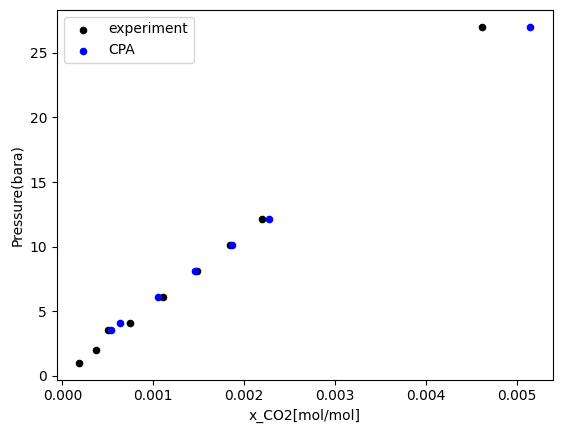

In [ ]:
#set datafram for testing model
inpdata = data373

import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('CO2', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

fluid1.getPhase(0).getMixingRule().setBinaryInteractionParameter(0,1, 0.0950001306904282)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameter(0,1, 0.0950011306904282)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0)

def solubility(inp):
    fluid1.setPressure(inp[2], 'bara')
    fluid1.setTemperature(inp[1], 'K')
    try:
        TPflash(fluid1)
        return fluid1.getPhase('aqueous').getComponent('CO2').getx()
    except:
        return float('nan')
    
inpdataList = inpdata[['x1', 'Temperature', 'Pressure']].values.tolist()
solres = [solubility(inp) for inp in inpdataList]
dataWithExperiment = inpdata.assign(x_CPA_fitted = solres)

devdf = (dataWithExperiment['x_CPA_fitted'] - dataWithExperiment['x1']) / dataWithExperiment['x1']*100.0

dataWithExperimentAndDev = dataWithExperiment.assign(dev_fitted = devdf.values)

print('average deviation ', devdf.mean(axis=0))

dataWithExperimentAndDev.to_csv('./water-CO2-exp-fitted.csv')

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = inpdata.plot(x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='black')	
dataWithExperimentAndDev.plot(ax=plot1, x='x_CPA_fitted', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='blue')	
plt.legend(['experiment', 'CPA'])
plt.show()

# optimized results

288.15K : kij =  0.0282  (neqsim 0.038)
323.15K : kij =  0.069   (neqsim 0.08)
373.15 : kij = 0.095  (neqsim 0.13)

In [ ]:
from sklearn.linear_model import LinearRegression


x = np.array([288.15, 323.15, 373.15]).reshape((-1, 1))
y = np.array([0.0282, 0.069, 0.095])
model = LinearRegression()
model.fit(x, y)
print(f"kij: {model.intercept_}")
print(f"kijT: {model.coef_}")

kij: -0.1878446484018264
kijT: [0.00076767]


## Test new parameters

In [ ]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('CO2', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

fluid1.getPhase(0).getMixingRule().setBinaryInteractionParameter(0,1, -0.187844648401)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameter(0,1, -0.187844648401)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0.00076767)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0.00076767)

def solubility(inp):
    fluid1.setPressure(inp[2], 'bara')
    fluid1.setTemperature(inp[1], 'K')
    try:
        TPflash(fluid1)
        return fluid1.getPhase('aqueous').getComponent('CO2').getx()
    except:
        return float('nan')
    
inpdata = expdata_df[['x1', 'Temperature', 'Pressure']].values.tolist()
solres = [solubility(inp) for inp in inpdata]
dataWithExperiment = expdata_df.assign(x_CPA = solres)

devdf = (dataWithExperiment['x_CPA'] - dataWithExperiment['x1']) / dataWithExperiment['x1']*100.0

dataWithExperimentAndDev = dataWithExperiment.assign(dev = devdf.values)

print('median average deviation ', devdf.mad(axis=0))

dataWithExperimentAndDev.to_csv('./water-CO2-exp-fitted2.csv')

median average deviation  13.097331095434862


/tmp/ipykernel_649/123641612.py:34: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('median average deviation ', devdf.mad(axis=0))


## Automatic fitting